In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from PIL import Image
from pathlib import Path
from tqdm import tqdm

In [2]:
# Suppress TensorFlow info messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  # 1 - info messages not printed

**Data Download**

In [3]:
data_dir = Path("../data/raw/eurosat")
data_dir.mkdir(parents=True, exist_ok=True)

# Dataset download (EuroSAT)
ds, info = tfds.load('eurosat/rgb', as_supervised=True, with_info=True)

# Class names (labels)
class_ids = info.features['label'].names
print("All Classes/Labels in EuroSAT dataset:")
class_ids  # print(f"Classes: {class_ids}")

All Classes/Labels in EuroSAT dataset:


I0000 00:00:1761685562.535270   32947 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9515 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

**Data Organization**

In [4]:
# Total dataset size (number of examples/images)
split_keys = list(info.splits.keys())
split_key= split_keys[0]
ds_size = info.splits[split_key].num_examples

In [5]:
# Store images in class-specific subdirectories
with tqdm(total=ds_size, desc="Processing images", unit="img") as pbar:

    for idx, (image, label) in enumerate(ds[split_key]):

        image_np = image.numpy()
        label_np = label.numpy()

        class_id = class_ids[label_np]

        class_dir = data_dir / class_id
        class_dir.mkdir(exist_ok=True)

        image_pil = Image.fromarray(image_np)

        # Save
        image_id = f"{idx:05d}"
        image_pil.save(class_dir / f"{image_id}.jpg")

        pbar.update(1)

    print(f"All {ds_size} images processed and saved to {data_dir}.")

Processing images: 100%|██████████| 27000/27000 [00:07<00:00, 3541.03img/s] 

All 27000 images processed and saved to ../data/raw/eurosat.


**Data Samples**

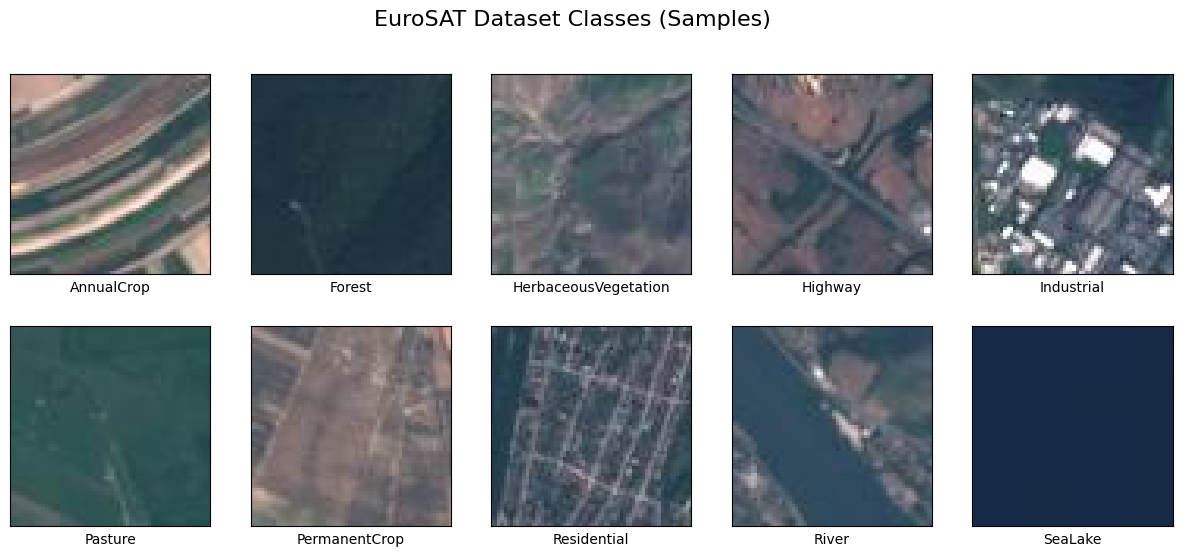

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('EuroSAT Dataset Classes (Samples)', fontsize=16)

for idx, class_id in enumerate(class_ids):

    row = idx // 5  # Floor division for row index
    col = idx % 5  # Modulus for column index

    ax = axes[row, col]
    
    class_dir = data_dir / class_id
    sample_dir = random.choice(list(class_dir.glob("*.jpg")))
    sample = Image.open(sample_dir)

    ax.imshow(sample)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(class_id)

    # custom alternative
    #axes[row, col].text(0.5, -0.1, class_id, fontsize=12, ha='center', transform=axes[row, col].transAxes)
    #axes[row, col].axis('off')

# plt.tight_layout()
plt.show()